In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,245029823,05/14/2022,03:02:00,BRONX,OUTSIDE,48,0.0,STREET,(null),False,...,(null),(null),18-24,M,BLACK,1.011526e+06,247828.000000,40.846864,-73.901413,POINT (-73.90141321 40.84686352)
27308,239583450,01/22/2022,13:15:00,MANHATTAN,OUTSIDE,30,0.0,STREET,(null),False,...,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,9.974580e+05,240485.000000,40.826743,-73.952273,POINT (-73.952273 40.826743)
27309,246825728,06/18/2022,03:29:00,MANHATTAN,OUTSIDE,32,0.0,STREET,(null),False,...,M,BLACK,25-44,M,BLACK,1.000999e+06,234464.000000,40.810209,-73.939496,POINT (-73.9394955 40.81020941)
27310,246876579,06/19/2022,20:08:00,BRONX,INSIDE,46,2.0,HOUSING,MULTI DWELL - PUBLIC HOUS,False,...,M,BLACK,25-44,M,WHITE HISPANIC,1.012980e+06,251028.000000,40.855644,-73.896141,POINT (-73.896141 40.855644)


In [3]:
# Check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27307    False
27308    False
27309    False
27310    False
27311    False
Length: 27312, dtype: bool

In [4]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [5]:
df['BORO'].isna().any()

False

In [6]:
df=df.drop(['LOC_CLASSFCTN_DESC','LOC_OF_OCCUR_DESC'], axis=1)

In [7]:
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,105,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,108,0.0,NaN,True,NaN,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,47,0.0,NaN,True,25-44,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,245029823,05/14/2022,03:02:00,BRONX,48,0.0,(null),False,(null),(null),(null),18-24,M,BLACK,1.011526e+06,247828.000000,40.846864,-73.901413,POINT (-73.90141321 40.84686352)
27308,239583450,01/22/2022,13:15:00,MANHATTAN,30,0.0,(null),False,25-44,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,9.974580e+05,240485.000000,40.826743,-73.952273,POINT (-73.952273 40.826743)
27309,246825728,06/18/2022,03:29:00,MANHATTAN,32,0.0,(null),False,18-24,M,BLACK,25-44,M,BLACK,1.000999e+06,234464.000000,40.810209,-73.939496,POINT (-73.9394955 40.81020941)
27310,246876579,06/19/2022,20:08:00,BRONX,46,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,WHITE HISPANIC,1.012980e+06,251028.000000,40.855644,-73.896141,POINT (-73.896141 40.855644)


# 1.What is the trend in the number of shooting incidents over the years?

In [8]:
df['OCCUR_DATE']=pd.to_datetime(df['OCCUR_DATE'])

In [9]:
trends= df.groupby(df.OCCUR_DATE.dt.year)['INCIDENT_KEY'].count()

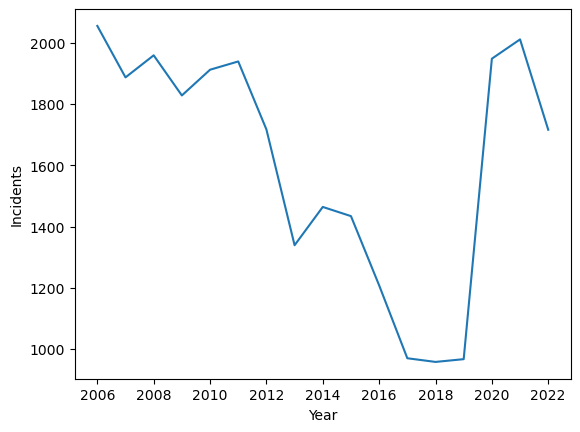

In [10]:
plt.plot(trends)
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.show()

# 2.Which borough has the highest number of shooting incidents? Is there a correlation between the borough and the number of incidents?

In [11]:
borough = df.groupby('BORO')['INCIDENT_KEY'].count()

In [12]:
borough.sort_values(ascending=False).head(1)

BORO
BROOKLYN    10933
Name: INCIDENT_KEY, dtype: int64

In [13]:
df['BORO'].corr(borough)

nan

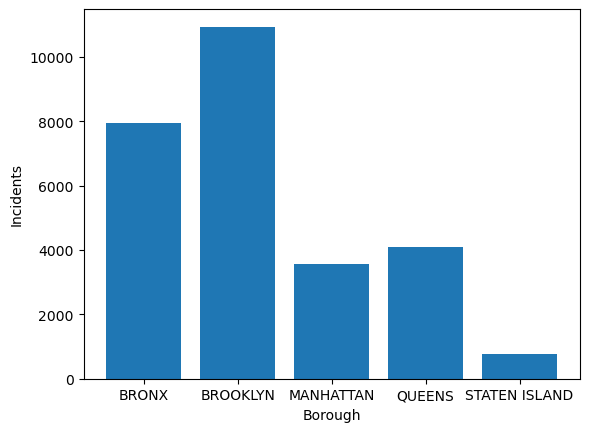

In [14]:
plt.bar(borough.index,borough.values)
plt.xlabel('Borough')
plt.ylabel('Incidents')
plt.show()

# 3.What time of day do most shooting incidents occur?

In [15]:
df['OCCUR_TIME']=pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S')

In [16]:
morning_range = range(6, 12)
afternoon_range = range(12, 18)
evening_range = range(18, 24)
night_range = range(0, 6)

def categorize_time(hour):
    if hour in morning_range:
        return 'Morning'
    elif hour in afternoon_range:
        return 'Afternoon'
    elif hour in evening_range:
        return 'Evening'
    else:
        return 'Night'

df['TIME_OF_DAY'] = df['OCCUR_TIME'].dt.hour.apply(categorize_time)


In [17]:
time= df.groupby('TIME_OF_DAY')['INCIDENT_KEY'].count()
time.sort_values(ascending=False)

TIME_OF_DAY
Evening      10846
Night         9855
Afternoon     4881
Morning       1730
Name: INCIDENT_KEY, dtype: int64

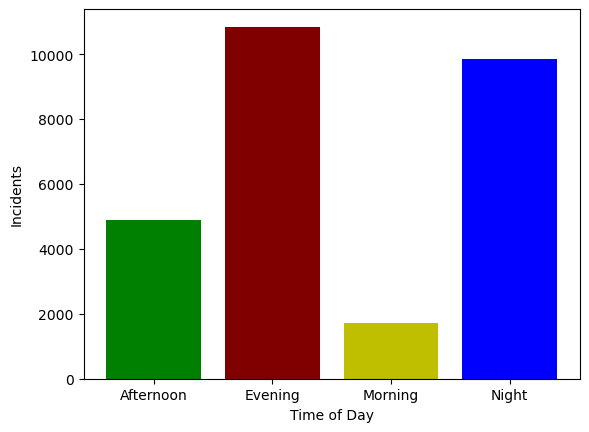

In [18]:
plt.bar(time.index,time.values, color=['g','maroon','y','b'])
plt.xlabel('Time of Day')
plt.ylabel('Incidents')
plt.show()

# 4.Are there any specific locations where shooting incidents are more prevalent?

In [19]:
df.groupby('LOCATION_DESC')['INCIDENT_KEY'].count().sort_values(ascending=False).head(15)

LOCATION_DESC
MULTI DWELL - PUBLIC HOUS    4832
MULTI DWELL - APT BUILD      2835
(null)                        977
PVT HOUSE                     951
GROCERY/BODEGA                694
BAR/NIGHT CLUB                628
COMMERCIAL BLDG               292
RESTAURANT/DINER              204
NONE                          175
BEAUTY/NAIL SALON             112
FAST FOOD                     104
SOCIAL CLUB/POLICY LOCATI      72
GAS STATION                    71
HOSPITAL                       65
LIQUOR STORE                   41
Name: INCIDENT_KEY, dtype: int64

# 5.Is there any correlation between the precinct and the number of shooting incidents?


In [20]:
precinct=df.groupby('PRECINCT')['INCIDENT_KEY'].count()

In [21]:
precinct.sort_values(ascending=False)

PRECINCT
75     1557
73     1452
67     1216
44     1020
79     1012
       ... 
112      23
19       20
111      11
17       10
22        1
Name: INCIDENT_KEY, Length: 77, dtype: int64

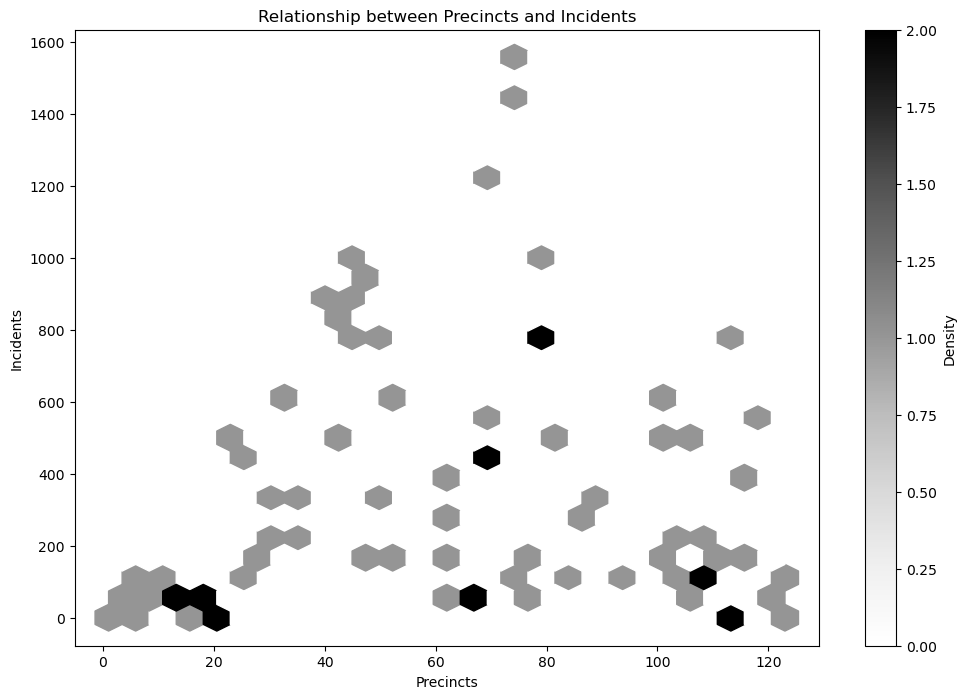

In [34]:
def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='Greys')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    plt.show()
    
generate_hexbin_plot(precinct.index, precinct.values, 'Precincts', 'Incidents', 'Relationship between Precincts and Incidents')


# 6.How many shooting incidents resulted in murder? Is there any pattern in the location or time of these incidents?

In [23]:
df.groupby('STATISTICAL_MURDER_FLAG')['INCIDENT_KEY'].count()

STATISTICAL_MURDER_FLAG
False    22046
True      5266
Name: INCIDENT_KEY, dtype: int64

In [24]:
 df[df['STATISTICAL_MURDER_FLAG']==True].groupby('TIME_OF_DAY')['INCIDENT_KEY'].count()

TIME_OF_DAY
Afternoon     943
Evening      2066
Morning       436
Night        1821
Name: INCIDENT_KEY, dtype: int64

In [25]:
 df[df['STATISTICAL_MURDER_FLAG']==True].groupby('LOCATION_DESC')['INCIDENT_KEY'].count()

LOCATION_DESC
(null)                       162
BAR/NIGHT CLUB               128
BEAUTY/NAIL SALON             25
CANDY STORE                    2
CHAIN STORE                    2
CHECK CASH                     1
CLOTHING BOUTIQUE              4
COMMERCIAL BLDG               59
DEPT STORE                     4
DRUG STORE                     6
DRY CLEANER/LAUNDRY            1
FACTORY/WAREHOUSE              3
FAST FOOD                     15
GAS STATION                   18
GROCERY/BODEGA               142
GYM/FITNESS FACILITY           1
HOSPITAL                       7
HOTEL/MOTEL                   15
JEWELRY STORE                  2
LIQUOR STORE                  16
LOAN COMPANY                   1
MULTI DWELL - APT BUILD      778
MULTI DWELL - PUBLIC HOUS    897
NONE                          47
PVT HOUSE                    322
RESTAURANT/DINER              32
SCHOOL                         1
SHOE STORE                     4
SMALL MERCHANT                13
SOCIAL CLUB/POLICY LOCATI    

In [26]:
pivot_table = df.pivot_table(index='LOCATION_DESC', columns='TIME_OF_DAY', values='STATISTICAL_MURDER_FLAG', aggfunc='count')

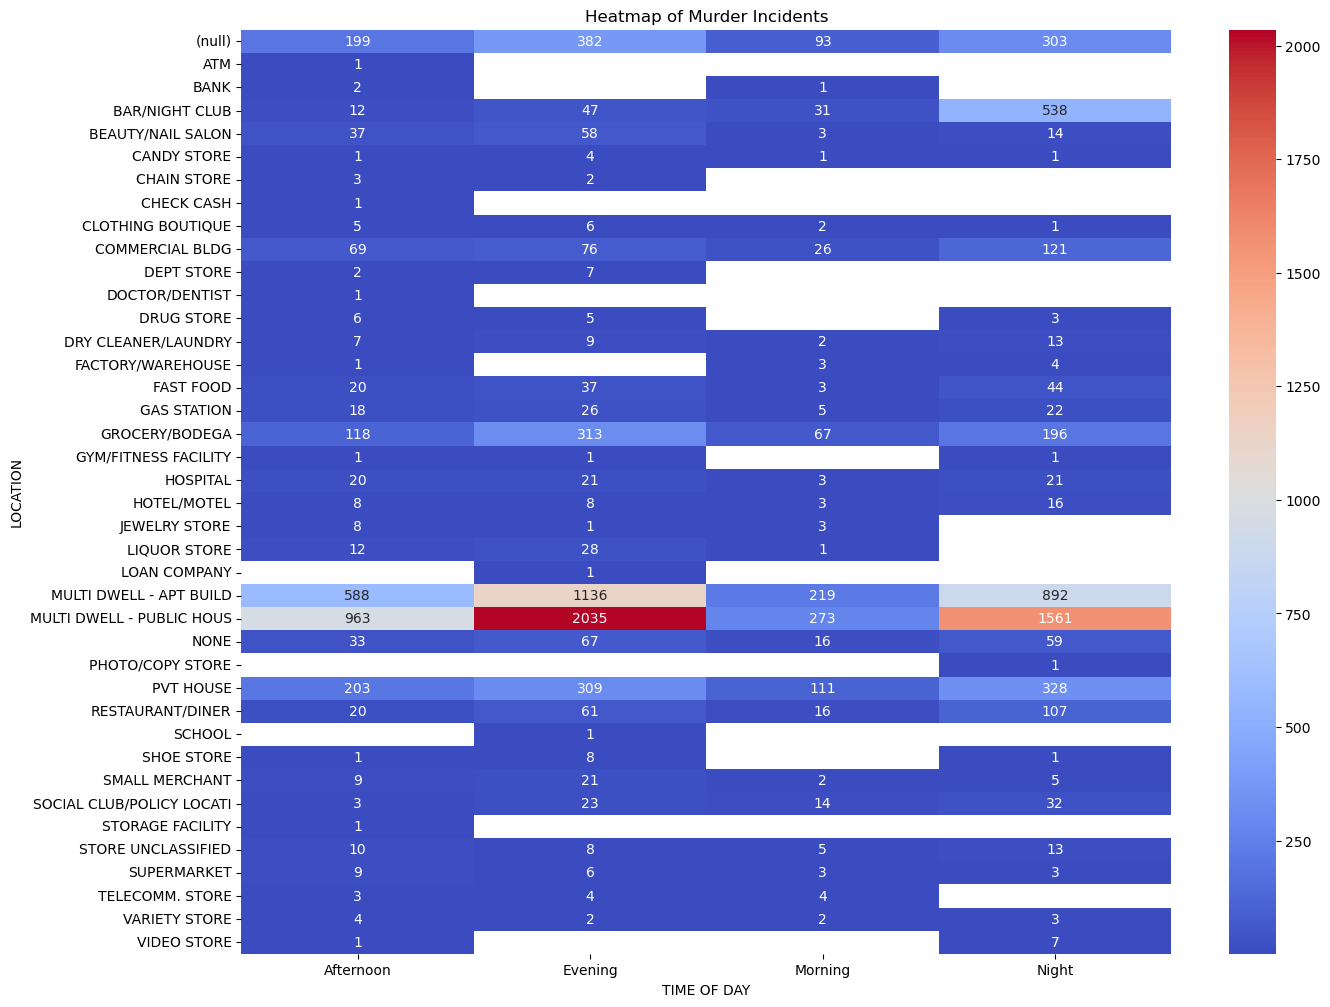

In [27]:
plt.figure(figsize=(15, 12))  
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt="g")  
plt.title('Heatmap of Murder Incidents')  
plt.ylabel('LOCATION')  
plt.xlabel('TIME OF DAY') 
plt.show()

# 7.What are the demographics (age group, sex, race) of the perpetrators involved in shooting incidents?

In [28]:
df['PERP_AGE_GROUP']=df['PERP_AGE_GROUP'].replace(['1020','224','940','(null)'],'UNKNOWN')
df['PERP_RACE']=df['PERP_RACE'].replace('(null)','UNKNOWN')
df['PERP_SEX']=df['PERP_SEX'].replace('(null)','U')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_12968\3326404507.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


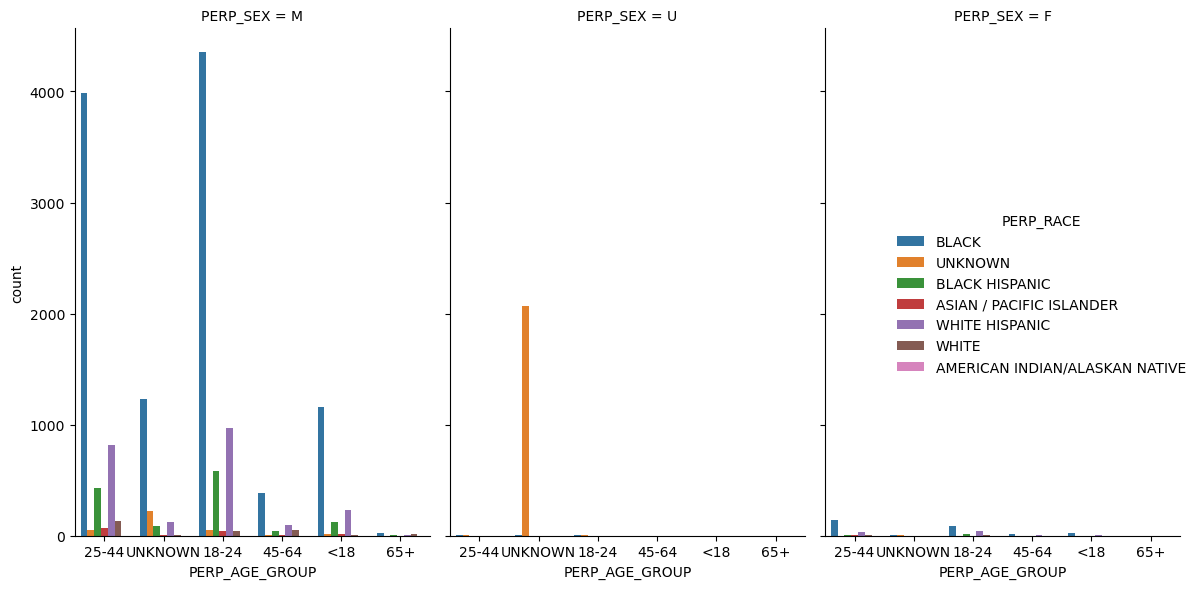

In [29]:
sns.catplot(x='PERP_AGE_GROUP',hue='PERP_RACE',col="PERP_SEX",kind='count', data=df, height=6, aspect=.5)
plt.tight_layout()
plt.show()

# 8.Explore the demographic characteristics (age group, sex, race) of victims.Do any patterns emerge?

In [30]:
df['VIC_AGE_GROUP']=df['VIC_AGE_GROUP'].replace('1022','UNKNOWN')


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_12968\2689548006.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


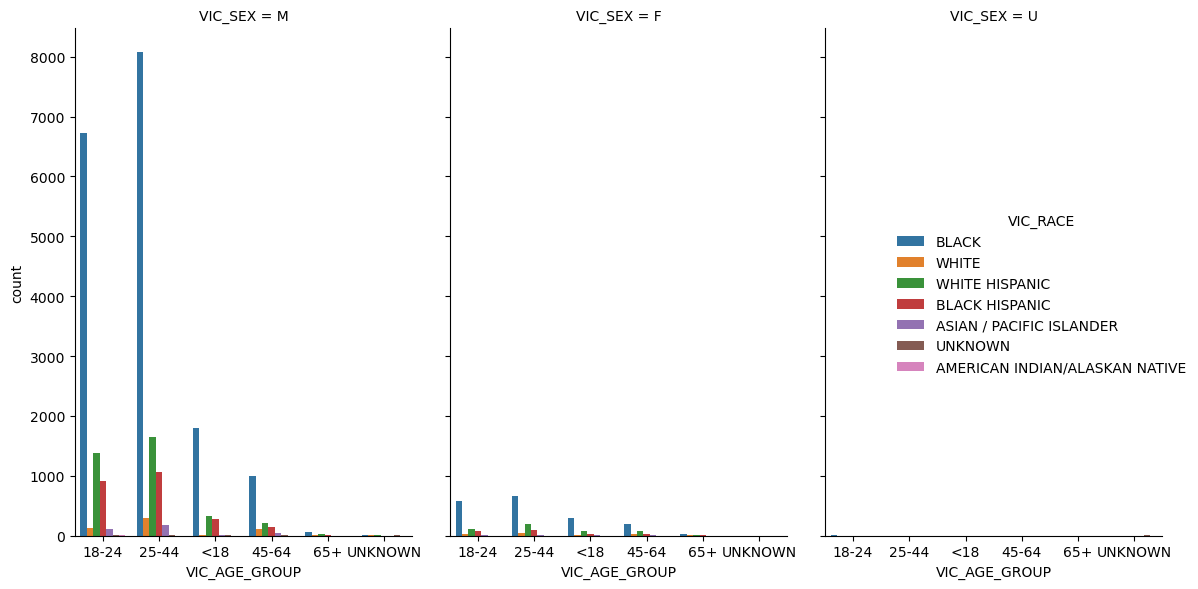

In [31]:
sns.catplot(df,x='VIC_AGE_GROUP',hue='VIC_RACE', col='VIC_SEX',kind='count',height=6, aspect=.5)
plt.tight_layout()
plt.show()

# 9.Are there any correlations between different variables, such as the age group of the perpetrator and the age group of the victim, or the borough and the victim's race?

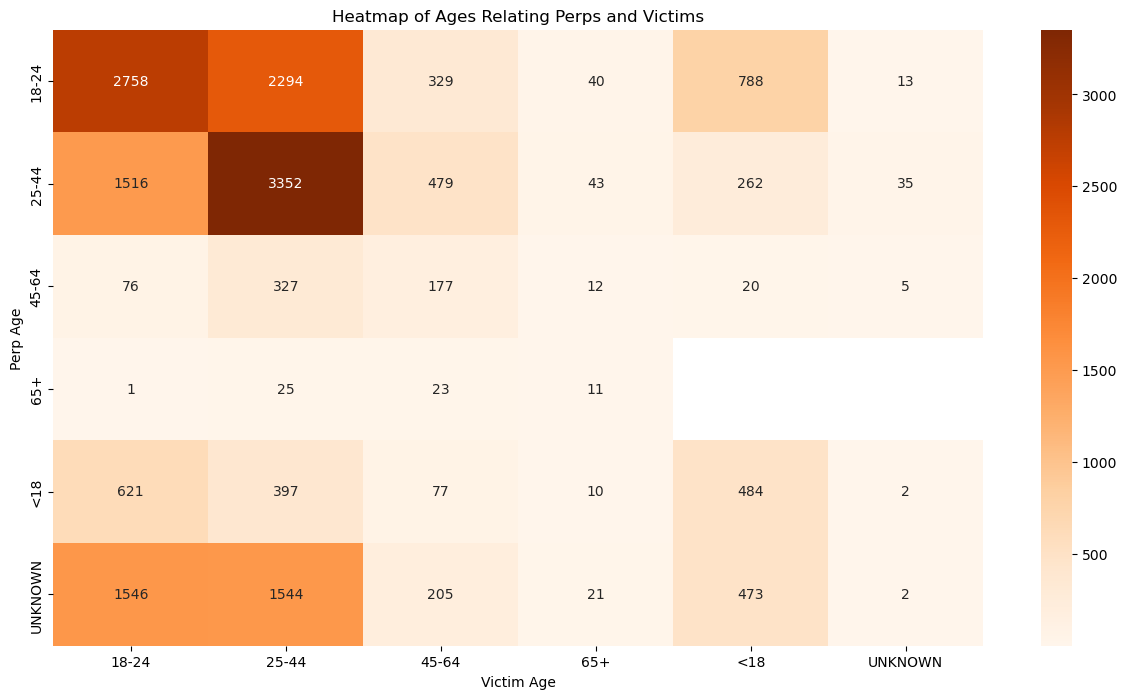

In [35]:
ages = df.pivot_table(index='PERP_AGE_GROUP', columns='VIC_AGE_GROUP', values='INCIDENT_KEY', aggfunc='count')
plt.figure(figsize=(15, 8))  
sns.heatmap(ages, annot=True, cmap='Oranges', fmt="g")  
plt.title('Heatmap of Ages Relating Perps and Victims')  
plt.ylabel('Perp Age')  
plt.xlabel('Victim Age') 
plt.show()

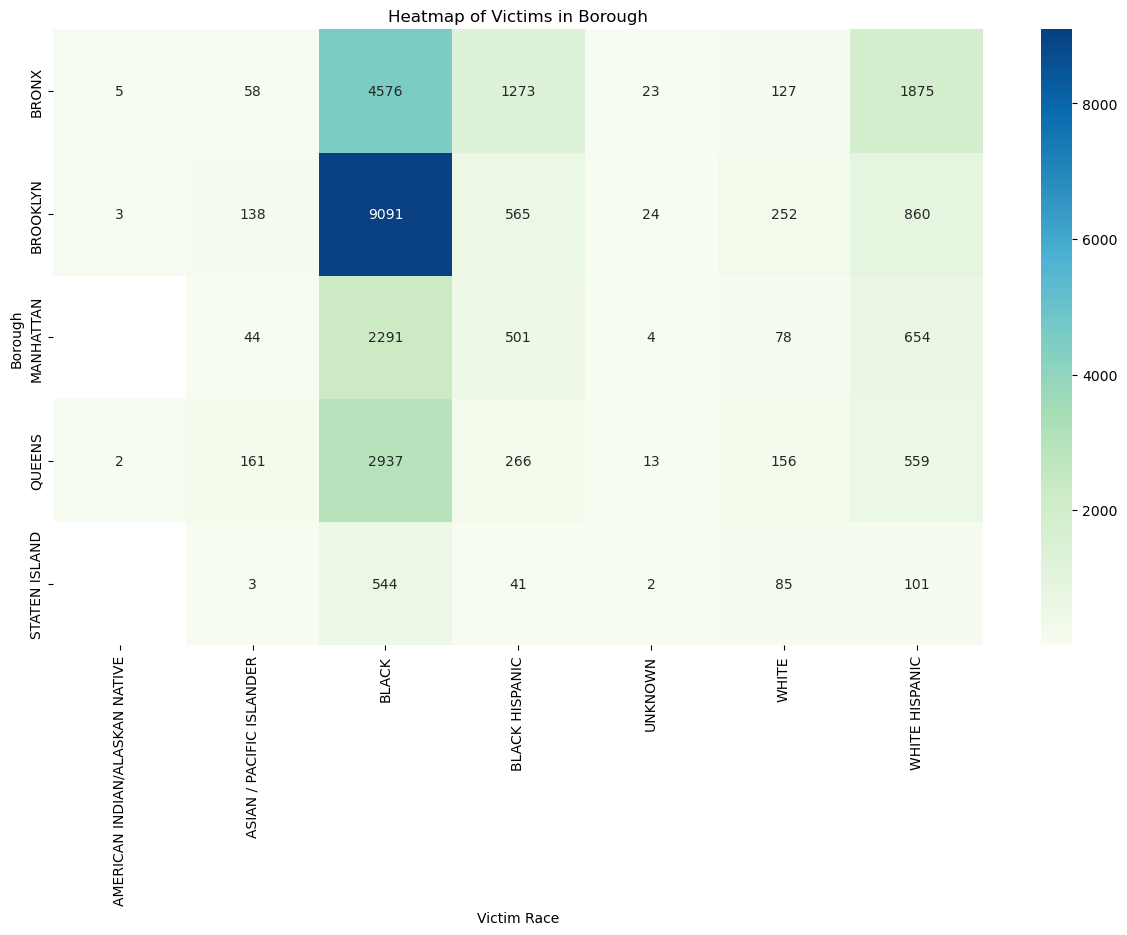

In [33]:
borough_vict = df.pivot_table(index='BORO', columns='VIC_RACE', values='INCIDENT_KEY', aggfunc='count')
plt.figure(figsize=(15, 8))  
sns.heatmap(borough_vict, annot=True, cmap='GnBu', fmt="g")  
plt.title('Heatmap of Victims in Borough')  
plt.ylabel('Borough')  
plt.xlabel('Victim Race') 
plt.show()